In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/Users/carolinavega/Downloads/11Bogota/11_Bogota_CSV/CNPV2018_5PER_A2_11.CSV")
gm=pd.read_csv("/Users/carolinavega/Downloads/11Bogota/11_Bogota_CSV/CNPV2018_MGN_A2_11.CSV")

In [ ]:
delitos_ingresos=pd.read_excel("/Users/carolinavega/Downloads/DelitosBog2018_Ingresos.xlsx")

In [41]:
delitos_ingresos['LOCALIDAD.1'] = pd.to_numeric(delitos_ingresos['LOCALIDAD.1'], errors='coerce').fillna(0).astype(int)


In [ ]:
delitos_ingresos.head()

In [ ]:
gm.head()

In [ ]:
gm.shape

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
gm['LLAVEVIV']= gm['COD_ENCUESTAS'] + gm['U_VIVIENDA']
df['LLAVEVIV']= df['COD_ENCUESTAS'] + df['U_VIVIENDA']

In [ ]:
union_result = pd.merge(df, gm, on='LLAVEVIV', how="left")


In [ ]:
union_result = union_result.drop_duplicates().reset_index(drop=True)


In [ ]:
union_result.shape

In [ ]:
union_result.head(100)

In [ ]:
def datos_faltantes(dataframe):
    percentual_datos_faltantes = pd.DataFrame({
    'Columnas': dataframe.columns,
    'Porcentaje de Ceros': (dataframe == 0).mean() * 100,
    'Porcentaje de NaN': dataframe.isna().mean() * 100,
    'Porcentaje de Valores Nulos': (dataframe.isnull() | (dataframe == '')).mean() * 100  
})
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    return percentual_datos_faltantes

In [ ]:
dados=datos_faltantes(union_result)

In [ ]:
dados

In [ ]:
columnas_seleccionadas = ['TIPO_REG', 'U_DPTO_x', 'U_MPIO_x', 'COD_ENCUESTAS_x', 
                        'P_NRO_PER', 'P_SEXO', 'P_EDADR',  'PA1_GRP_ETNIC','P_ALFABETA','P_TRABAJO', 'UA1_LOCALIDAD', 'COD_DANE_ANM']

df_seleccionado = union_result[columnas_seleccionadas]

In [ ]:
df_seleccionado.head()

In [ ]:
dados2=datos_faltantes(df_seleccionado)

In [ ]:
dados2

In [ ]:
df_seleccionado = df_seleccionado.dropna()
df_seleccionado = df_seleccionado.dropna(axis=1)


In [ ]:
df_seleccionado.shape

In [ ]:
etnia_mapping = {
    1: 'Indígena',
    2: 'Gitano(a) o Rrom',
    3: 'Raizal del Archipielago de San Andrés, Providencia y Santa Catalina',
    4: 'Palenquero(a) de San Basilio',
    5: 'Negro(a), Mulato(a), Afrodescendiente, Afrocolombiano(a)',
    6: 'Ningún grupo étnico',
    9: 'No Informa'
}

# Crear un nuevo campo 'ETNIA_DESC' basado en la asignación
df_seleccionado['ETNIA_DESC'] = df_seleccionado['PA1_GRP_ETNIC'].map(etnia_mapping)

In [ ]:
df_seleccionado['SEXO']=np.where(df_seleccionado['P_SEXO']==1, 'Hombre', 'Mujer')



In [ ]:
df_seleccionado.tail()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='UA1_LOCALIDAD', hue='SEXO', data=df_seleccionado)
plt.title('Distribución por Sexo en Diferentes Localidades')
plt.xlabel('Localidad')
plt.ylabel('Número de Personas')
plt.show()

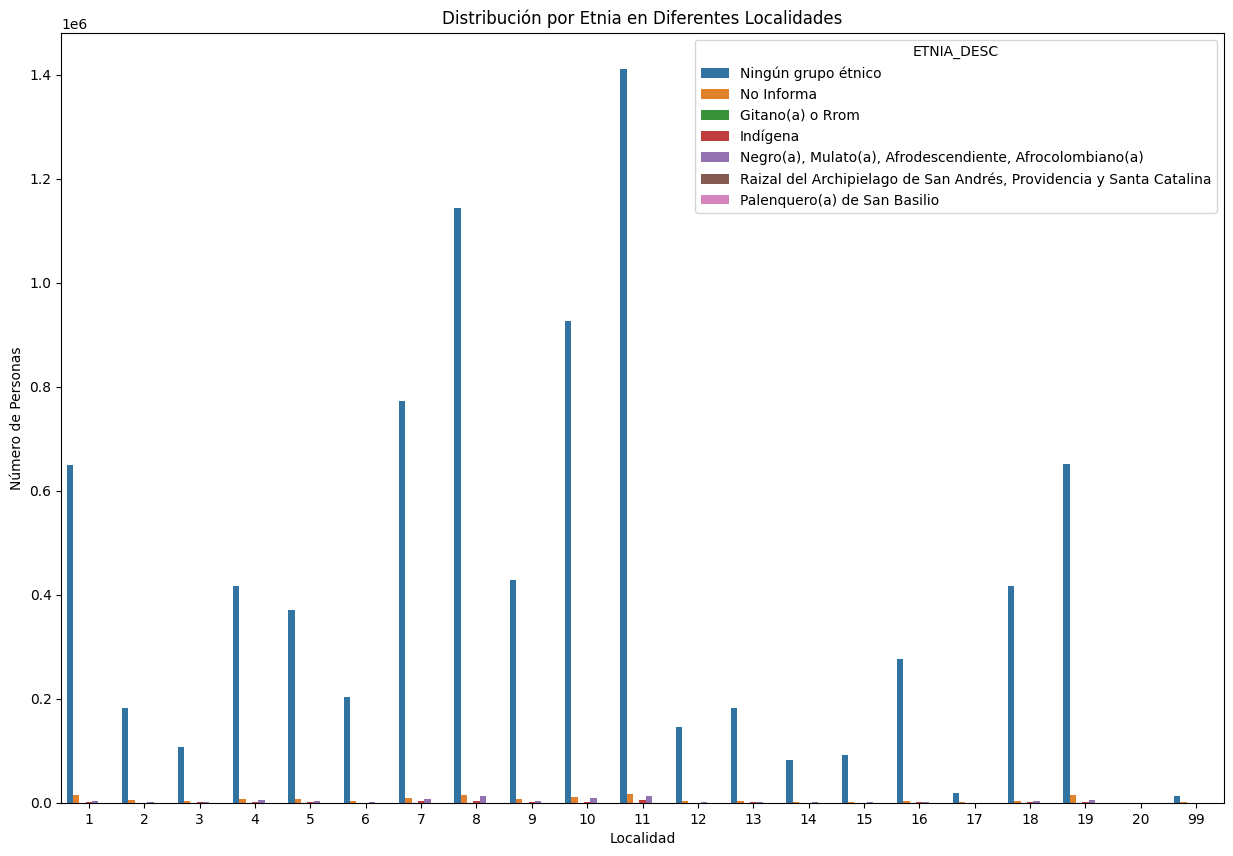

In [40]:
plt.figure(figsize=(15, 10))
sns.countplot(x='UA1_LOCALIDAD', hue='ETNIA_DESC', data=df_seleccionado)
plt.title('Distribución por Etnia en Diferentes Localidades')
plt.xlabel('Localidad')
plt.ylabel('Número de Personas')
plt.show()

In [38]:
df_combinado = pd.merge(df_seleccionado, delitos_ingresos, left_on='UA1_LOCALIDAD', right_on='LOCALIDAD')


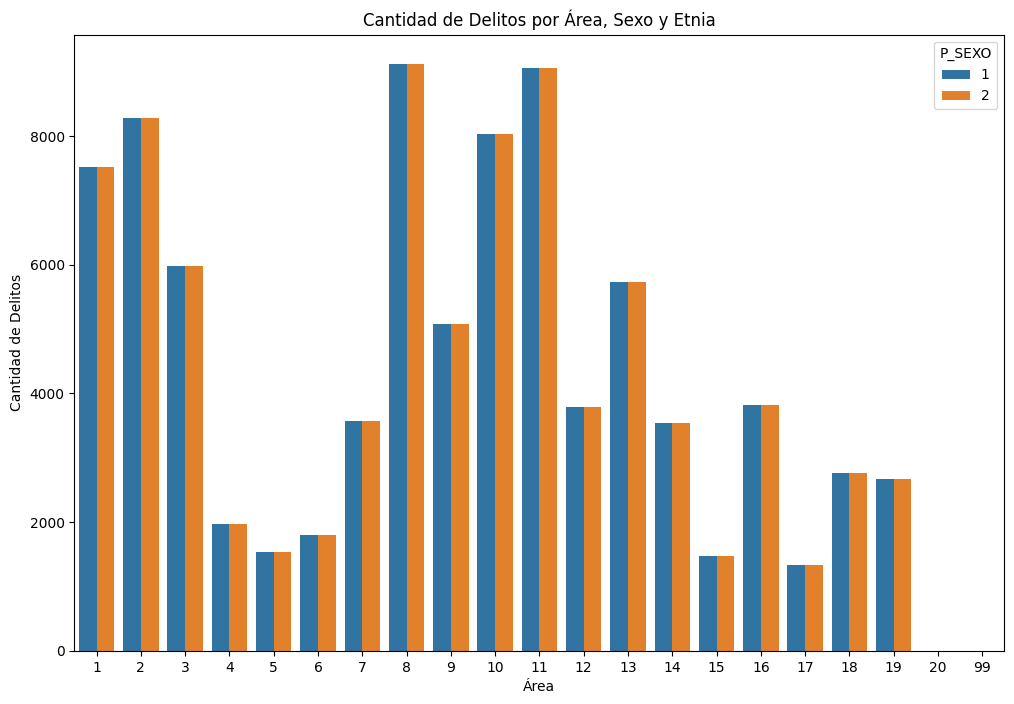

In [ ]:
df_seleccionado.to_csv('/Users/carolinavega/Downloads/datos_bogota_v2.csv', index=False)
